# Data Exploration

In this step, the data is analyzed and visualized to gain a better understanding of the patterns and trends it contains. This may involve creating graphs, plots, and charts to visualize the data, and using statistical techniques to identify relationships and correlations.

## Setup Environment

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import pickle

## Import Data

In [3]:
## Import Data

# Warning: Run the data_exploration.ipynb to generate the explored_spotify_data.csv
df = pd.read_csv('../data/explored_spotify_data.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.head(4)

,disc_number,duration_ms,explicit,track_id,track_name,popularity,track_number,artist_name,album_name,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,239359,1,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,96,1,Drake,Her Loss,2022-11-04,...,11,-9.342,0,0.244,0.050300,0.000002,0.355,0.424,153.150,3
1,1,198973,1,6DCZcSspjsKoFjzjrWoCdn,God's Plan,85,5,Drake,Scorpion,2018-06-29,...,7,-9.211,1,0.109,0.033200,0.000083,0.552,0.357,77.169,4
2,1,160821,1,7l2nxyx7IkBX5orhkALg0V,Privileged Rappers,83,5,Drake,Her Loss,2022-11-04,...,5,-7.384,1,0.198,0.002740,0.000000,0.123,0.616,144.045,4
3,1,218364,1,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),90,14,Drake,"Honestly, Nevermind",2022-06-17,...,0,-4.711,1,0.175,0.000307,0.000002,0.093,0.366,165.921,4


## Check constants columns

During the data exploration, we didn't analyze the behaviour of data. If we want to have a consistent and high quality dataset, we need to remove every attribute with no information inside. In other words, we should delete columns without any variation of data or with single-element domain.

In [4]:
for col in df.columns:
    if len(df[col].value_counts()) == 1:
        print(f'{col} => {df[col][0]}')

In [5]:
# values inside the previous column determinate the nature of the subset of data inside the merged dataset. 
# They aren't actually useful, so, we can delete them.
df = df.drop(columns=['is_local', 'track_type', 'artist_type', 'album_type.1', 'album_type', 'features_type'])
df.head(5)

KeyError: "['is_local', 'track_type', 'artist_type', 'album_type.1', 'album_type', 'features_type'] not found in axis"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39863 entries, 0 to 39862
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   disc_number             39863 non-null  int64  
 1   duration_ms             39863 non-null  int64  
 2   explicit                39863 non-null  bool   
 3   track_id                39863 non-null  object 
 4   track_name              39863 non-null  object 
 5   popularity              39863 non-null  int64  
 6   track_number            39863 non-null  int64  
 7   artist_id               39863 non-null  object 
 8   artist_name             39863 non-null  object 
 9   album_id                39863 non-null  object 
 10  album_name              39863 non-null  object 
 11  release_date            39863 non-null  object 
 12  release_date_precision  39863 non-null  object 
 13  total_tracks            39863 non-null  int64  
 14  danceability            39863 non-null

## Remove subset id attributes

In [ ]:
# the references of single subset of data such as artists, album and features id are useless in the merged dataset
df = df.drop(columns=['artist_id', 'album_id'], axis=1)
df.head(5)

,disc_number,duration_ms,explicit,track_id,track_name,popularity,track_number,artist_name,album_name,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,239359,True,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,96,1,Drake,Her Loss,2022-11-04,...,11,-9.342,0,0.244,0.050300,0.000002,0.3550,0.424,153.150,3
1,1,198973,True,6DCZcSspjsKoFjzjrWoCdn,God's Plan,85,5,Drake,Scorpion,2018-06-29,...,7,-9.211,1,0.109,0.033200,0.000083,0.5520,0.357,77.169,4
2,1,160821,True,7l2nxyx7IkBX5orhkALg0V,Privileged Rappers,83,5,Drake,Her Loss,2022-11-04,...,5,-7.384,1,0.198,0.002740,0.000000,0.1230,0.616,144.045,4
3,1,218364,True,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),90,14,Drake,"Honestly, Nevermind",2022-06-17,...,0,-4.711,1,0.175,0.000307,0.000002,0.0930,0.366,165.921,4
4,1,189893,True,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),88,7,Drake,I NEVER LIKED YOU,2022-04-29,...,1,-4.474,1,0.340,0.314000,0.000000,0.0686,0.339,83.389,4


## Changing boolean variables in integer

In [ ]:
# the only boolean variable is explicit
df.explicit = df.explicit.astype(int)
df.head(2)

,disc_number,duration_ms,explicit,track_id,track_name,popularity,track_number,artist_name,album_name,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,239359,1,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,96,1,Drake,Her Loss,2022-11-04,...,11,-9.342,0,0.244,0.0503,0.000002,0.355,0.424,153.150,3
1,1,198973,1,6DCZcSspjsKoFjzjrWoCdn,God's Plan,85,5,Drake,Scorpion,2018-06-29,...,7,-9.211,1,0.109,0.0332,0.000083,0.552,0.357,77.169,4


## Export result dataset

In [ ]:
df.to_csv('../data/cleaned_spotify_data.csv')

## Spotify Exploration

In [6]:
df.head(5)

,disc_number,duration_ms,explicit,track_id,track_name,popularity,track_number,artist_name,album_name,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,239359,1,1bDbXMyjaUIooNwFE9wn0N,Rich Flex,96,1,Drake,Her Loss,2022-11-04,...,11,-9.342,0,0.244,0.050300,0.000002,0.3550,0.424,153.150,3
1,1,198973,1,6DCZcSspjsKoFjzjrWoCdn,God's Plan,85,5,Drake,Scorpion,2018-06-29,...,7,-9.211,1,0.109,0.033200,0.000083,0.5520,0.357,77.169,4
2,1,160821,1,7l2nxyx7IkBX5orhkALg0V,Privileged Rappers,83,5,Drake,Her Loss,2022-11-04,...,5,-7.384,1,0.198,0.002740,0.000000,0.1230,0.616,144.045,4
3,1,218364,1,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),90,14,Drake,"Honestly, Nevermind",2022-06-17,...,0,-4.711,1,0.175,0.000307,0.000002,0.0930,0.366,165.921,4
4,1,189893,1,59nOXPmaKlBfGMDeOVGrIK,WAIT FOR U (feat. Drake & Tems),88,7,Drake,I NEVER LIKED YOU,2022-04-29,...,1,-4.474,1,0.340,0.314000,0.000000,0.0686,0.339,83.389,4


In [7]:
# find if there is null elements in each column
pd.isnull(df).sum()

disc_number               0
duration_ms               0
explicit                  0
track_id                  0
track_name                0
popularity                0
track_number              0
artist_name               0
album_name                0
release_date              0
release_date_precision    0
total_tracks              0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

We don't have null values, so the exploration mantains consistent over distributions.

In [40]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
disc_number,39863.0,1.020144,0.200272,1.0,1.0000,1.000000,1.00000,11.000
duration_ms,39863.0,216504.147104,70484.993052,19181.0,179066.0000,208306.000000,242506.00000,4643866.000
explicit,39863.0,0.250282,0.433181,0.0,0.0000,0.000000,1.00000,1.000
popularity,39863.0,53.554349,17.072315,0.0,46.0000,56.000000,64.00000,100.000
track_number,39863.0,5.920453,6.869679,1.0,1.0000,4.000000,8.00000,262.000
total_tracks,39863.0,13.791411,13.088163,1.0,7.0000,13.000000,17.00000,378.000
danceability,39863.0,0.620897,0.159637,0.0,0.5190,0.635000,0.73900,0.981
energy,39863.0,0.646868,0.203528,0.0,0.5200,0.674000,0.80400,0.999
key,39863.0,5.269774,3.604601,0.0,2.0000,5.000000,8.00000,11.000
loudness,39863.0,-6.998121,3.585259,-60.0,-8.2215,-6.238000,-4.77600,0.642


In [41]:
from datetime import datetime

# convert object in string
df.release_date = df.release_date.astype(str)

def extract_year(value):
    if value[:4] == '2022':
        return value
    else:
        return None

df_2022 = df.copy(deep=True)
df_2022.release_date = df_2022.release_date.apply(extract_year)
df_2022.dropna(subset=['release_date'], inplace=True)

print('Popular Tracks in 2022:')
df_2022.sort_values(by=['popularity'], ascending=False)[['track_name', 'artist_name', 'popularity', 'release_date', 'loudness', 'danceability', 'liveness', 'valence', 'tempo', 'instrumentalness', 'energy']].head(10)

Popular Tracks in 2022:


,track_name,artist_name,popularity,release_date,loudness,danceability,liveness,valence,tempo,instrumentalness,energy
1306,Unholy (feat. Kim Petras),Sam Smith,100,2022-09-22,-7.375,0.714,0.2660,0.238,131.121,0.000005,0.472
1072,I'm Good (Blue),David Guetta,98,2022-08-26,-3.673,0.561,0.3710,0.304,128.040,0.000007,0.965
7988,La Bachata,Manuel Turizo,98,2022-05-26,-5.329,0.835,0.2180,0.850,124.980,0.000002,0.679
11864,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,97,2022-07-06,-5.548,0.621,0.2300,0.550,128.033,0.033000,0.782
196,Anti-Hero,Taylor Swift,97,2022-10-21,-6.571,0.637,0.1420,0.533,97.008,0.000002,0.643
0,Rich Flex,Drake,96,2022-11-04,-9.342,0.561,0.3550,0.424,153.150,0.000002,0.520
147,Creepin' (with The Weeknd & 21 Savage),The Weeknd,96,2022-12-02,-6.005,0.715,0.0822,0.172,97.950,0.000000,0.620
5425,Kill Bill,SZA,96,2022-12-09,-5.750,0.644,0.1610,0.430,88.993,0.169000,0.728
51,Me Porto Bonito,Bad Bunny,96,2022-05-06,-5.105,0.911,0.0933,0.425,92.005,0.000027,0.712
50,Tití Me Preguntó,Bad Bunny,95,2022-05-06,-5.198,0.650,0.1260,0.187,106.672,0.000291,0.715


In [33]:
# define the same table for the overall tracks
df.sort_values(by=['popularity'], ascending=False)[['track_name', 'artist_name', 'popularity', 'release_date', 'loudness', 'danceability', 'liveness', 'valence', 'tempo', 'instrumentalness', 'energy']].head(20)

,track_name,artist_name,popularity,release_date,loudness,danceability,liveness,valence,tempo,instrumentalness,energy
1306,Unholy (feat. Kim Petras),Sam Smith,100,2022-09-22,-7.375,0.714,0.2660,0.238,131.121,0.000005,0.472
7509,All I Want for Christmas Is You,Mariah Carey,99,1994-10-28,-7.463,0.336,0.0708,0.350,150.273,0.000000,0.627
1072,I'm Good (Blue),David Guetta,98,2022-08-26,-3.673,0.561,0.3710,0.304,128.040,0.000007,0.965
7988,La Bachata,Manuel Turizo,98,2022-05-26,-5.329,0.835,0.2180,0.850,124.980,0.000002,0.679
196,Anti-Hero,Taylor Swift,97,2022-10-21,-6.571,0.637,0.1420,0.533,97.008,0.000002,0.643
11864,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,97,2022-07-06,-5.548,0.621,0.2300,0.550,128.033,0.033000,0.782
0,Rich Flex,Drake,96,2022-11-04,-9.342,0.561,0.3550,0.424,153.150,0.000002,0.520
5425,Kill Bill,SZA,96,2022-12-09,-5.750,0.644,0.1610,0.430,88.993,0.169000,0.728
51,Me Porto Bonito,Bad Bunny,96,2022-05-06,-5.105,0.911,0.0933,0.425,92.005,0.000027,0.712
28884,Last Christmas,Wham!,96,1984-11-29,-12.472,0.735,0.3550,0.947,107.682,0.000002,0.478


### Correlation Matrix

/var/folders/jd/ysm594m928dfp92zgrlsp1vr0000gn/T/ipykernel_15902/2487270868.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), annot=True)


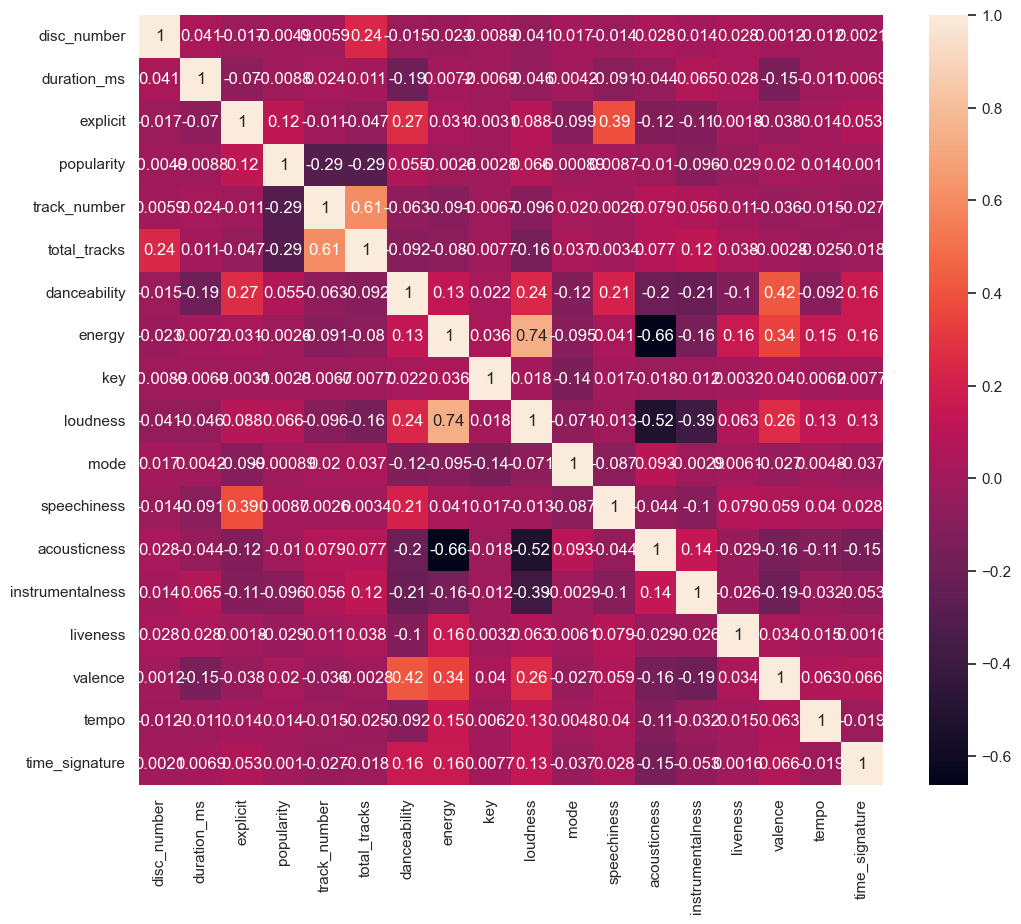

In [37]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(df.corr(), annot=True)
plt.show()

### Bivariate KDE

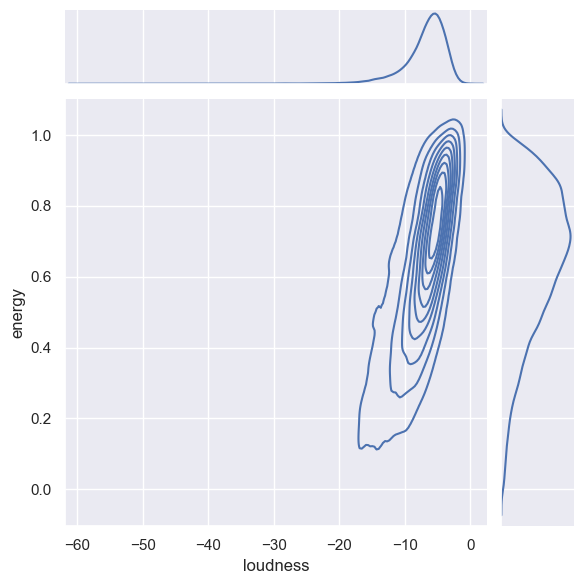

In [38]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=df, x="loudness", y="energy", kind="kde")